<a href="https://colab.research.google.com/github/kalebmes/CS376-Machine-Learning/blob/main/Pytorch_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np

In [ ]:
data = [[1, 2], 
        [3, 4]]

x_data = torch.tensor(data)

In [ ]:
np_array = np.array(data)
x2_data = torch.tensor(np_array)
x2_data == torch.from_numpy(np_array)

tensor([[True, True],
        [True, True]])

In [ ]:
x_ones = torch.ones_like(x_data)
print(x_ones.type())
torch.from_numpy(np.arange(10)).type()

torch.LongTensor


'torch.LongTensor'

In [ ]:
x_rand = torch.rand_like(x_data, dtype=torch.float)
shape = (2, 3)
print(torch.rand(size=(2, 3)))
ones_tensor = torch.ones(shape)
print(ones_tensor.type())
zeros_tensor = torch.zeros(shape)
print(zeros_tensor)

tensor([[0.2538, 0.3047, 0.4569],
        [0.8266, 0.0108, 0.6917]])
torch.FloatTensor
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
#now let's examine the attribute of a tensor
tensor = torch.rand(3, 4)
print("Our tensor -> ")
print(tensor)
print("Shape of the tensor: ", tensor.shape)
print("Data type of the tensor: ", tensor.dtype)
print("Device the tensor is stored on", tensor.device)

(raws, columns) = tensor.shape
raws, columns

numlist = torch.arange(10)
# numlist[numlist > 5]
tensor[tensor > 0.5]

Our tensor -> 
tensor([[0.9702, 0.6539, 0.2872, 0.6490],
        [0.1461, 0.5827, 0.6314, 0.9448],
        [0.3486, 0.6395, 0.5285, 0.4620]])
Shape of the tensor:  torch.Size([3, 4])
Data type of the tensor:  torch.float32
Device the tensor is stored on cpu


tensor([0.9702, 0.6539, 0.6490, 0.5827, 0.6314, 0.9448, 0.6395, 0.5285])

In [ ]:
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print("My tensor is stord on: ", tensor.device)

In [ ]:
my_tensor = torch.zeros((4, 6))
print(my_tensor)

my_tensor[:, 0:-1:2] = 30
print(my_tensor)

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
tensor([[30.,  0., 30.,  0., 30.,  0.],
        [30.,  0., 30.,  0., 30.,  0.],
        [30.,  0., 30.,  0., 30.,  0.],
        [30.,  0., 30.,  0., 30.,  0.]])


In [ ]:
t1 = torch.arange(10).reshape(1,10)
t2 = torch.randint(low=0, high=10, size=(1,10))
torch.cat([t1, t2], dim=0)

A = torch.tensor([[1, 2, 3], 
                  [2, 1, 8]])
B = torch.tensor([[3, 5, 9], 
                  [2, 1, 9]])
C = torch.tensor([[1],[2],[3]])
print("A + B: ")
print(A+B)

print("A * B: elementwise")
print(A * B) #same with numpy - * is an elementwise multiplication

print("A * B: matrixmultipliation")
print(torch.matmul(A, B.T))
print(A @ B.T)

A + B: 
tensor([[ 4,  7, 12],
        [ 4,  2, 17]])
A * B: elementwise
tensor([[ 3, 10, 27],
        [ 4,  1, 72]])
A * B: matrixmultipliation
tensor([[40, 31],
        [83, 77]])
tensor([[40, 31],
        [83, 77]])


In [ ]:
A.add_(10)
print(A)

tensor([[51, 52, 53],
        [52, 51, 58]])


In [ ]:
#so pytorch and numpy can be made to share the same memory location using from_numpy() and numpy() methods
#the former extracts a tensor from a numpy array, and the latter extracts a numpy array from a tensor
numlist = np.arange(10)
my_t = torch.from_numpy(numlist) # share the same memory with 'numlist'
my_t2 = torch.tensor(numlist) #just copies the elements and form the tensor
print(numlist, my_t)

numlist[0] = -12
print(numlist)
print(my_t)
print(my_t2)

my_t3 = torch.arange(10)
nums = my_t3.numpy() # share the memory locaion with 'my_t3'
nums2 = np.array(my_t3) #just creates a numpy array copy with the entries of my_t3
my_t3[0] = 2938
print(nums)
print(my_t3)
print(nums2)

[0 1 2 3 4 5 6 7 8 9] tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
[-12   1   2   3   4   5   6   7   8   9]
tensor([-12,   1,   2,   3,   4,   5,   6,   7,   8,   9])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
[2938    1    2    3    4    5    6    7    8    9]
tensor([2938,    1,    2,    3,    4,    5,    6,    7,    8,    9])
[0 1 2 3 4 5 6 7 8 9]


### now we'll take a look at Autograd

In [ ]:
import torchvision
model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1,1000)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
prediction = model(data) # forward propagation

In [ ]:
loss= (prediction - labels).sum()
loss.backward() #backward propagation - now autograd calculates and stores the gradients for each model parameter in the parameter's .grad attribute

In [ ]:
#now we'll load an optimizer. in this SGD, with a learning rate of 0.01, and we'll also apply a momentum of 0.9
optim = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [ ]:
optim.step() #this initiates the gradient descent

In [ ]:
#how does autograd work though? 
a = torch.tensor([2, 3], requires_grad=True, dtype=float)
b = torch.tensor([6, 4], requires_grad=True, dtype=float)
Q = 3*a**3 - b**2
Q.backward(gradient=torch.tensor([1, 1]))

In [ ]:
print(b.grad)

tensor([-12.,  -8.], dtype=torch.float64)


## Neural Networks with pytorch

In [ ]:
#let's define the network
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

  def __init__(self) -> None:
      super(Net, self).__init__()
      #1 input image channel, 6 output image channel and 5x5 square convolution kernel
      self.conv1 = nn.Conv2d(1, 6, 5)
      self.conv2 = nn.Conv2d(6, 16, 5)
      #y = Wx + b
      self.fc1 = nn.Linear(16*5*5, 120)
      self.fc2 = nn.Linear(120, 84)
      self.fc3 = nn.Linear(84, 10)
      

In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets


In [ ]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [ ]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [ ]:
for data in trainset:
  print(data)
  break


[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [ ]:
x, y = data[0][0], data[1][0]
x.shape

torch.Size([1, 28, 28])

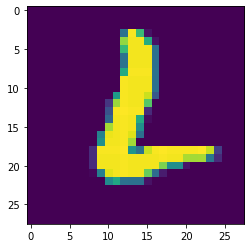

In [ ]:
#how to view them as images
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))
plt.show()

In [ ]:
#initialize counter dict with zeros
counter_dict = {}
for i in range(10):
  counter_dict[i] = 0
total = 0
for data in trainset:
  xs, ys = data
  for y in ys:
    counter_dict[int(y)] += 1
    total += 1

counter_dict

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

In [ ]:
for (num, occ) in counter_dict.items():
  print(f"{num}: {occ*100/total}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915


In [ ]:
#now let's build our neural network classification model
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
  
  def __init__(self) -> None:
    super().__init__()
    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return F.log_softmax(x, dim=1)
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
X = torch.rand((28, 28))
X = X.view(-1, 28*28)
output = net(X)

In [ ]:
output

tensor([[-2.2548, -2.2010, -2.3242, -2.1923, -2.2132, -2.4519, -2.3229, -2.4009,
         -2.2697, -2.4366]], grad_fn=<LogSoftmaxBackward0>)

In [ ]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr=0.001)
epochs = 3
for epoch in range(epochs):
  for data in trainset:
    X, y = data
    net.zero_grad()
    output = net(X.view(-1, 28*28))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()
  print(loss)

tensor(0.0709, grad_fn=<NllLossBackward0>)
tensor(0.1788, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)


In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in trainset:
    X, y = data
    output = net(X.view(-1, 784))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.976


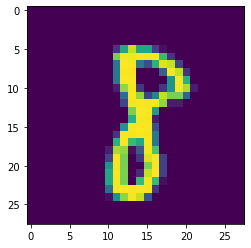

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[1].view(28,28))
plt.show()

In [ ]:
print(torch.argmax(net(X[1].view(-1, 784))[0]))

tensor(8)


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    #1 input image channel, 6 output channels, 5x5 square convolution kernel
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.conv2 = nn.Conv2d(6, 16, 5)
    #an affine operation: y = Wx + b
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
  
  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
